## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 40 (delta 12), reused 12 (delta 5), pack-reused 17
Receiving objects: 100% (40/40), 11.00 MiB | 12.78 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [9]:
df = pd.read_csv("./knn/data/heart_failure_clinical_records_dataset.csv")

df = df.drop(columns=["time"])
df.isna().sum()
# There does not appear to be any NAs in this dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

2. Make a correlation matrix. What variables are strongly associated with a death event?

In [13]:
# Reordering columns so 'DEATH_EVENT' appears first
df = df.rename(columns={'DEATH_EVENT':'death_event'})
df = df[['death_event', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]

correlation_matrix = df.corr()
correlation_matrix
# Age, ejection fraction, serum creatinine, and serum sodium are the most strongly
# correlated with death event.

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')


,death_event,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
death_event,1.000000,0.253729,0.066270,0.062728,-0.001943,-0.268603,0.079351,-0.049139,0.294278,-0.195204,-0.004316,-0.012623
age,0.253729,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668
anaemia,0.066270,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290
creatinine_phosphokinase,0.062728,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421
diabetes,-0.001943,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173
ejection_fraction,-0.268603,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315
high_blood_pressure,0.079351,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711
platelets,-0.049139,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234
serum_creatinine,0.294278,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414
serum_sodium,-0.195204,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813


3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [29]:
print(df.loc[:, [ 'death_event', 'anaemia']].groupby(['anaemia']).describe())
print(df.loc[:, ['diabetes', 'death_event']].groupby(['diabetes']).describe())
print(df.loc[:, ['sex', 'death_event']].groupby(['sex']).describe())
print(df.loc[:, ['high_blood_pressure', 'death_event']].groupby(['high_blood_pressure']).describe())
print(df.loc[:, ['smoking', 'death_event']].groupby(['smoking']).describe())

# Sex is the only variable which shows a higher proportion of death events

        death_event                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         death_event                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
    death_event                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
0         105.0  0.323810  0.470173  0.0  0.0  0.0  1.0  1.0
1         194.0  0.319588  0.467523  0.0  0.0  0.0  1.0  1.0
                    death_event         

Looking at the above variable summaries, anaemia and high blood pressure seem to be the only two variables that show a difference in the mean proportion of death events. The mean proportions of death events for high blood pressure is 0.37 versus 0.29, which is a notable difference. The mean proportion of death events for anaemia are 0.36 and 0.29. Other than high blood pressure and anaemia, the variables do not have very big differences in the mean proportions of death events, so going forward, we include high blood pressure and anaemia in our analysis.

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [65]:
# Set target variable
y = df['death_event']

# Feature matrix
X = df.loc[:, ['age', 'ejection_fraction', 'serum_creatinine', 'high_blood_pressure', 'anaemia']]
print(X.describe())

              age  ejection_fraction  serum_creatinine  high_blood_pressure  \
count  299.000000         299.000000         299.00000           299.000000   
mean    60.833893          38.083612           1.39388             0.351171   
std     11.894809          11.834841           1.03451             0.478136   
min     40.000000          14.000000           0.50000             0.000000   
25%     51.000000          30.000000           0.90000             0.000000   
50%     60.000000          38.000000           1.10000             0.000000   
75%     70.000000          45.000000           1.40000             1.000000   
max     95.000000          80.000000           9.40000             1.000000   

          anaemia  
count  299.000000  
mean     0.431438  
std      0.496107  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


5. Maxmin normalize all of the variables in `X`.

In [72]:
# Maxmin normalization
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return(u)

# Apply transformation to features
X = X.apply(maxmin)
print(X)

          age  ejection_fraction  serum_creatinine  high_blood_pressure  \
0    0.636364           0.090909          0.157303                  1.0   
1    0.272727           0.363636          0.067416                  0.0   
2    0.454545           0.090909          0.089888                  0.0   
3    0.181818           0.090909          0.157303                  0.0   
4    0.454545           0.090909          0.247191                  0.0   
..        ...                ...               ...                  ...   
294  0.400000           0.363636          0.067416                  1.0   
295  0.272727           0.363636          0.078652                  0.0   
296  0.090909           0.696970          0.033708                  0.0   
297  0.090909           0.363636          0.101124                  0.0   
298  0.181818           0.469697          0.123596                  0.0   

     anaemia  
0        0.0  
1        0.0  
2        0.0  
3        1.0  
4        1.0  
..       

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [74]:
# Train test split
from sklearn.model_selection import train_test_split

np.random.seed(100)
N = X.shape[0] # N = length of dataset (rows)
all = np.arange(1, N) # Creates an array of all indices in the data set, 1 to N-1
train = np.random.choice(N, int(0.8*N)) # Generate random indices for train#
test = [item for item in all if item not in train] # Identify test indices (indices not in train set)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

299
[  8 280  79  53  66 226  14 290 240 280 143 228  58 137  93  86 155 141
 245 211 100   4  91 135  49 193 270 183 251   2 105  63 181 283 238 167
 294 172 274 192 202 273  72  13 106  30  17  53  68 181   0  13 185 131
  70 131 212 207 215 131 176 180  36 261  38 214  94 226 170  95 114 237
 119  76 289 102 256 250 183 226 196 253   9 277 262 165 122 116 186 295
 107 222 286  66 243 273  89 291  16  12 109  67 220 223 276 138 264 200
 146  92  44 245  57 256  73 232 182 144  34 182  77 212  14 289 148 168
  24 284 210 135   2  63 130 215 145 237 218 250 224  74 286  67 156  82
 141  81 281 194 143 122  11 101  38 278  87 179 242 181 145 193 298 172
 144 182 183  83  42 248 246 293 112 208 113 258  16  70 224 177 162 131
 139 285 292  52 164 201  85  92 115 211 119  71  93 292 123  42 269  32
 294 296 181  93  38 116 214 165 128 187 297 204 141  87  65 182 128  83
 266 233 130 215 204  39 246 292 291  99  26 147 132  39 215  74 161 143
 145 151 234  59   8]
(239, 5) (239,) (130, 5) 

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
# Determine the optimal k
k_bar = 25 # Number of k's to try
k_grid = np.arange(1, k_bar) # Range of k's to consider
SSE = np.zeros(k_bar) # Store the SSE
#SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create model
    predictor = model.fit(X_train,y_train) # Train model
    y_hat = model.predict(X_test) # Make predictions
    SSE[k] = np.sum((y_test-y_hat)**2) # Calculate SSE for each k

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Optimal k
print("The optimal value of k is: ", k_star)

The optimal value of k is:  [6]


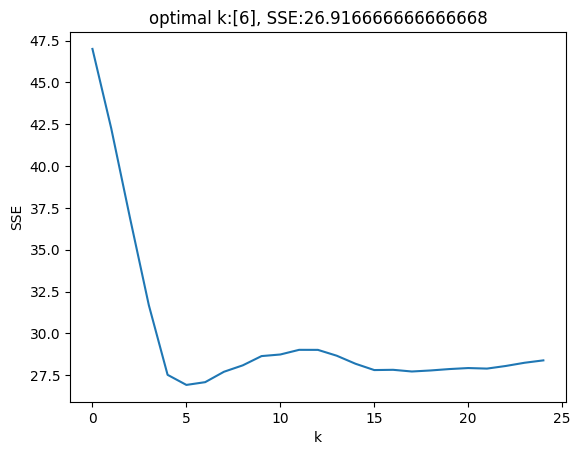

In [76]:
# Make the SSE plot
plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()
# optimal k = 6

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [92]:
# Set target and feature variables
y = df["death_event"]
X = df.loc[:, df.columns != 'death_event']
# X.columns

# Feature matrix
# print("Feature Matrix: ", "\n", X.describe())

# Normalize the values
X = X.apply(maxmin)

# Split the data
np.random.seed(100)
N = X.shape[0] # N = length of dataset (rows)
all = np.arange(1, N) # Creates an array of all indices in the data set, 1 to N-1
train = np.random.choice(N, int(0.8*N)) # Generate random indices for train#
test = [item for item in all if item not in train] # Identify test indices (indices not in train set)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Sanity check

# Find optimal k and SSE
k_bar = 25
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create model
    predictor = model.fit(X_train,y_train) # Train model
    y_hat = model.predict(X_test) # Make predictions
    SSE[k] = np.sum((y_test-y_hat)**2) # Calculate SSE for each k

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Optimal k
print("The optimal value of k is", k_star, "\n", "The SSE is", round(SSE_min, 4))

The optimal value of k is [23] 
 The SSE is 27.3535


The first model without all the variables has lower sum of squared error. However, if I had to use one of the two models in practice, I would use the second model. Even though the second model has a higher SSE, it includes more predictor variables, which is important given that we're working with health data and predicting the event of death. Though the first model is better statistically, the second model is better in a real-world context given the nature of our data.

In [94]:
# Testing out different variables

# Using the three most highly correlated variables to death_event
y = df['death_event']
X = df.loc[:, ['age', 'ejection_fraction', 'serum_creatinine']]
X = X.apply(maxmin)

np.random.seed(100)
N = X.shape[0]
all = np.arange(1, N)
train = np.random.choice(N, int(0.8*N))
test = [item for item in all if item not in train]
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

k_bar = 25
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create model
    predictor = model.fit(X_train,y_train) # Train model
    y_hat = model.predict(X_test) # Make predictions
    SSE[k] = np.sum((y_test-y_hat)**2) # Calculate SSE for each k

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Optimal k
print("The optimal value of k is", k_star, "\n", "The SSE is", round(SSE_min, 4))

The optimal value of k is [23] 
 The SSE is 23.9679


In [95]:
# Using the four least highly correlated values
y = df['death_event']
X = df.loc[:, ['diabetes', 'sex', 'smoking', 'platelets']]
X = X.apply(maxmin)

np.random.seed(100)
N = X.shape[0]
all = np.arange(1, N)
train = np.random.choice(N, int(0.8*N))
test = [item for item in all if item not in train]
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

k_bar = 25
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create model
    predictor = model.fit(X_train,y_train) # Train model
    y_hat = model.predict(X_test) # Make predictions
    SSE[k] = np.sum((y_test-y_hat)**2) # Calculate SSE for each k

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Optimal k
print("The optimal value of k is", k_star, "\n", "The SSE is", round(SSE_min, 4))

The optimal value of k is [23] 
 The SSE is 29.138


In [96]:
# Using just age as a predictor
y = df['death_event']
X = df.loc[:, ['age']]
X = X.apply(maxmin)

np.random.seed(100)
N = X.shape[0]
all = np.arange(1, N)
train = np.random.choice(N, int(0.8*N))
test = [item for item in all if item not in train]
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

k_bar = 25
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create model
    predictor = model.fit(X_train,y_train) # Train model
    y_hat = model.predict(X_test) # Make predictions
    SSE[k] = np.sum((y_test-y_hat)**2) # Calculate SSE for each k

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Optimal k
print("The optimal value of k is", k_star, "\n", "The SSE is", round(SSE_min, 4))

The optimal value of k is [19] 
 The SSE is 28.4626


As the number of predictor variables used increases, k and SSE increases. When I trained the model using the three most highly correlated variables to death event, k decreased from 26 (model with all variables) to 23. The SSE also decreased from 27.3535 to 23.9679. When I trained the model usinf the four least highly correlated values, the k remained the same at 23, but the SSE increased to 29.138. To further test the relationship between predictor variables, k, and SSE, I trained the model with just one variable, age, which has an obvious relationship with death event. This resulted in the lowest k, 19, but a high SSE, 28.4626. This shows that more variables are *not* always better, as using only values with low correlation with the target variable increases SSE and decreases accuracy. However, you don't want to use too few variables either. To train the "best" kNN model, you have to balance using the correct number of predictor variables and using statistically significant variables.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)